# Sales Forecast using Montecarlo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import style
from scipy.stats import norm

# Styles
style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = '#FFFFFF'
plt.rcParams['font.family'] = 'Georgia'
plt.rcParams['font.size'] = 18

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [10]:
# Load Data
df = pd.read_excel("Sample - Superstore.xls")
df = df.set_index('Order Date')

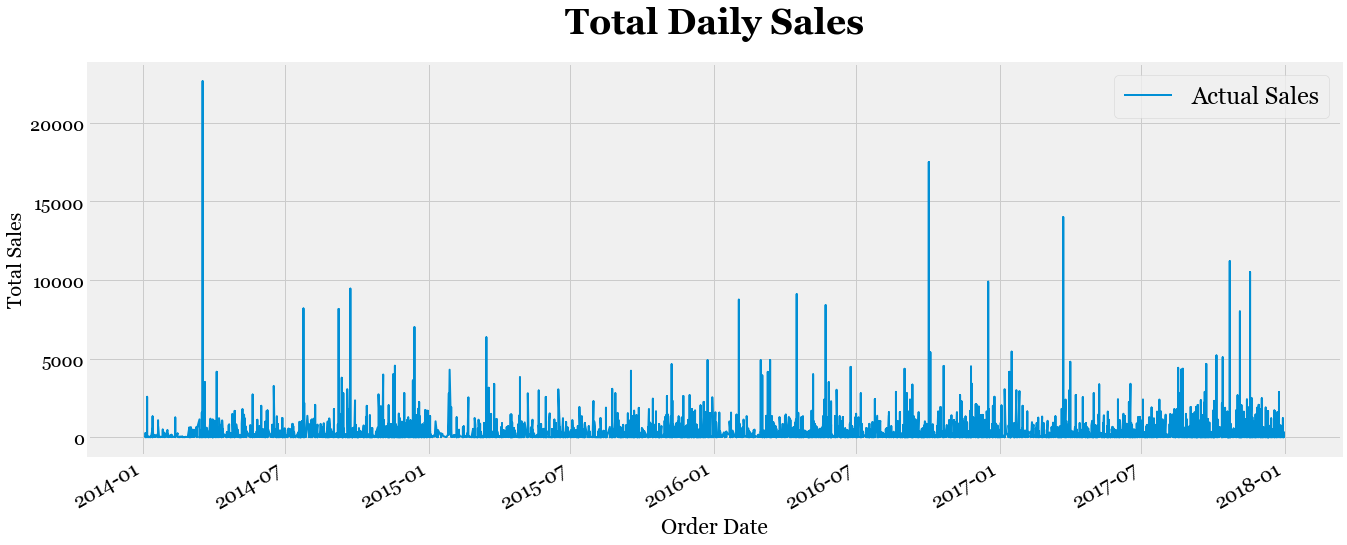

In [8]:
### Plot Daily Sales
fig, ax = plt.subplots(figsize=(20,8))

ax.set_title('Total Daily Sales', fontsize=35, fontweight='bold', pad=30)
ax.set_ylabel('Total Sales', fontsize=20)
#ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

for t in ax.xaxis.get_major_ticks():
    t.label.set_fontsize(20) 

df['Sales'].plot(ax=ax, linewidth=2, label="Actual Sales")
ax.legend(fontsize=24)

There are big swings in daily sales between 0 and $25K. For modelling purposes start off by looking at weekly sales.

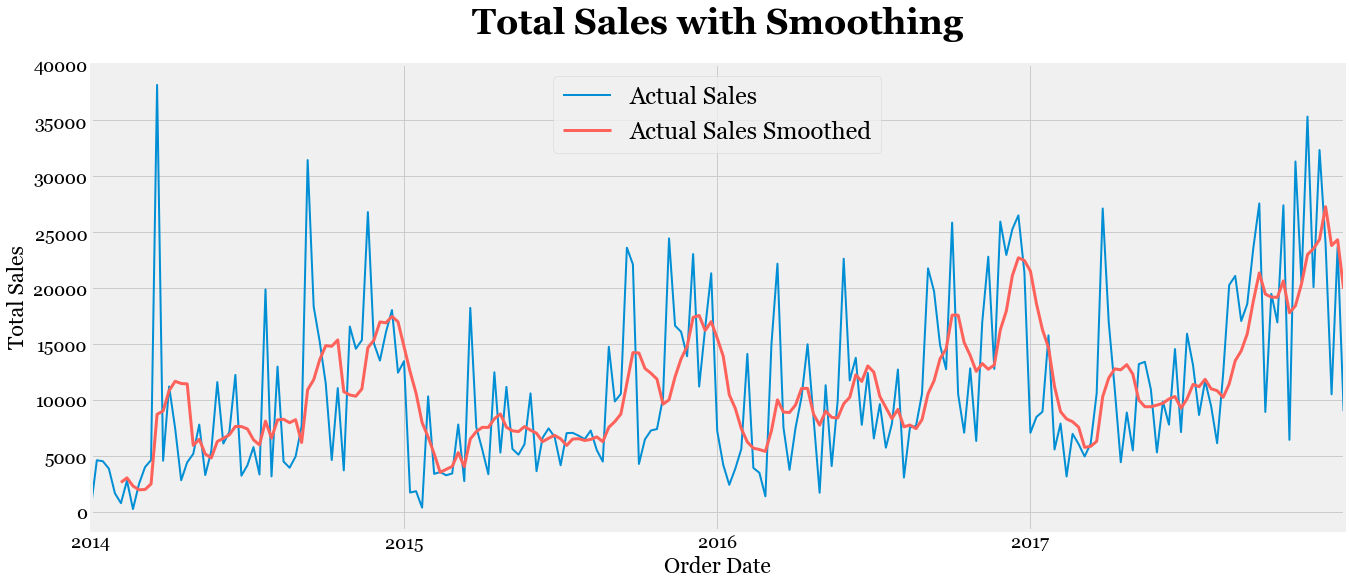

In [9]:
sales = df['Sales'].resample('W').sum()

# Total Sales with Smoothing
smoothed = sales.rolling(window=6).mean()
smoothed = smoothed.dropna()

fig, ax = plt.subplots(figsize=(20,8))

ax.set_title('Total Sales with Smoothing', fontsize=35, fontweight='bold', pad=30)
ax.set_ylabel('Total Sales')

sales.plot(ax=ax, linewidth=2, label="Actual Sales")
smoothed.plot(ax=ax, linewidth=3, color='#FF625B', label="Actual Sales Smoothed")
#ax.legend([plt1, plt2], ['Actual Sales', 'Actual Sales Smoothed'])
ax.legend(fontsize=24)

Volatility is a measure of how much a value changes over time. The more volatile the more drastic individual changes can be.

The weekly sales still have quite a bit of volatility (Blue Line). It can be dealt with by smoothing. The red line shows smoothing on a 6 week moving average.

Looking at the individual week’s smoothed sales, we can plot it on a standard distribution to get more insight into what they look like.

Text(0.5, 1.0, 'Distribution of Weekly Sales')

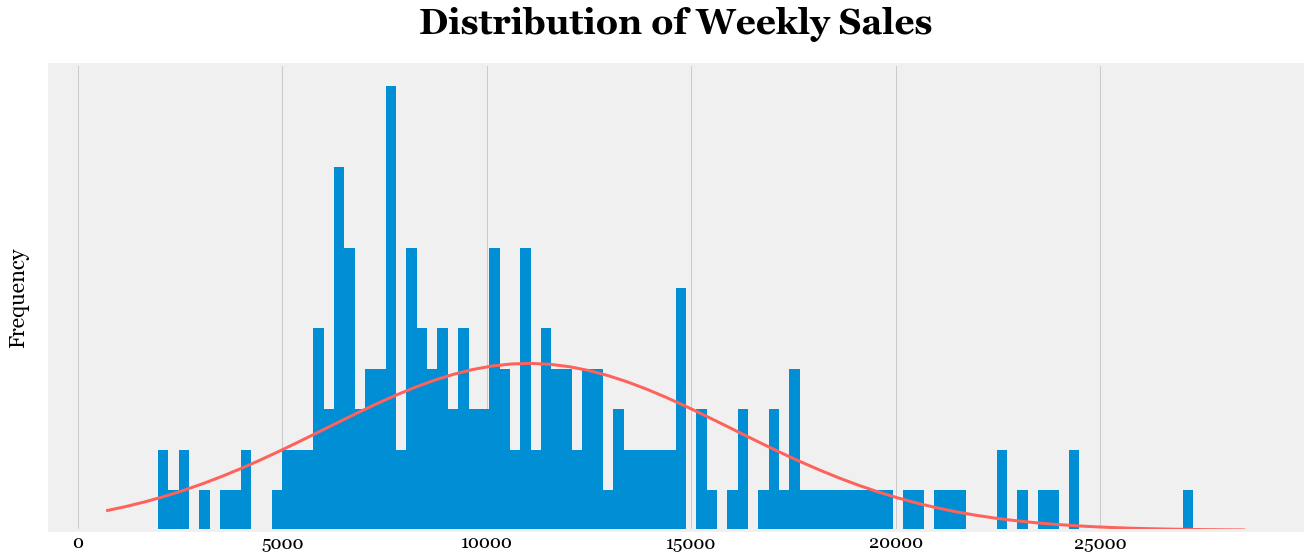

In [12]:
# Distribution of Weekly Sales
fig, ax = plt.subplots(figsize=(20,8))

smoothed.plot.hist(bins=100, density=True, ax=ax)

# Plot the pdf
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, smoothed.mean(), smoothed.std())
ax.plot(x, p, color='#FF625B', linewidth=3)

ax.set_yticks([])
ax.set_ylabel('Frequency', labelpad=20)
ax.set_title('Distribution of Weekly Sales', fontsize=35, fontweight='bold', pad=30)

Observation: 
    When we look at the data set, the majority of the sales happen between $5K and $15K. There are sales that happen outside these ranges but not as many.

It means we can assume that this is likely to be the case in the forecasting year as well.

In [27]:
last_sale = smoothed[-1]
num_weeks = 53

sales_series = []
sales_series.append(last_sale)
for week in range(num_weeks):
        weekly_sales = np.random.normal(mu, std) ## select a random number from the given normal disturbution with given mu and std
        if weekly_sales < 0:  ## Rounding of negaive values of sales to zero
            weekly_sales = 0
        sales_series.append(weekly_sales)

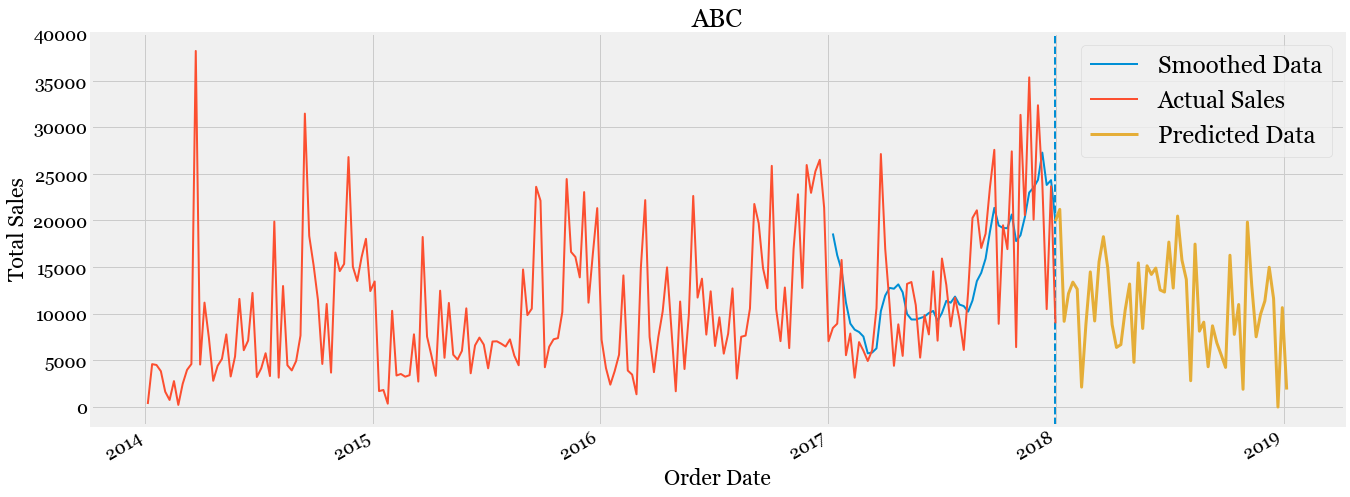

In [53]:
#smoothed[-52:]
sales_series = []
sales_series.append(last_sale)

for week in range(num_weeks):
    weekly_sales = np.random.normal(mu, std) ## select a random number from the given normal disturbution with given mu and std
    if weekly_sales < 0:  ## Rounding of negaive values of sales to zero
        weekly_sales = 0
    sales_series.append(weekly_sales)
s = pd.Series(sales_series, index=index)
fig, ax = plt.subplots(figsize=(20,8))
ax.set_title('ABC')
#ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
ax.axvline(x=(s.index.min().date()), linestyle='dashed', linewidth=2)

#ax.set_title('Total Sales with Smoothing', fontsize=35, fontweight='bold', pad=30)
ax.set_ylabel('Total Sales')

smoothed[-52:].plot(ax=ax, linewidth=2, label="Smoothed Data") ## Taking last 1 year data
sales.plot(ax=ax, linewidth=2, label="Actual Sales")
s.plot(ax=ax, linewidth=3, label = 'Predicted Data')
ax.legend(fontsize=24)

In [44]:
#ax.axvline(x=s.index.min(), linestyle='dashed', linewidth=2)
s.index.min().date()

datetime.date(2017, 12, 31)

Text(0.5, 1.05, 'Simulate Random Walks')

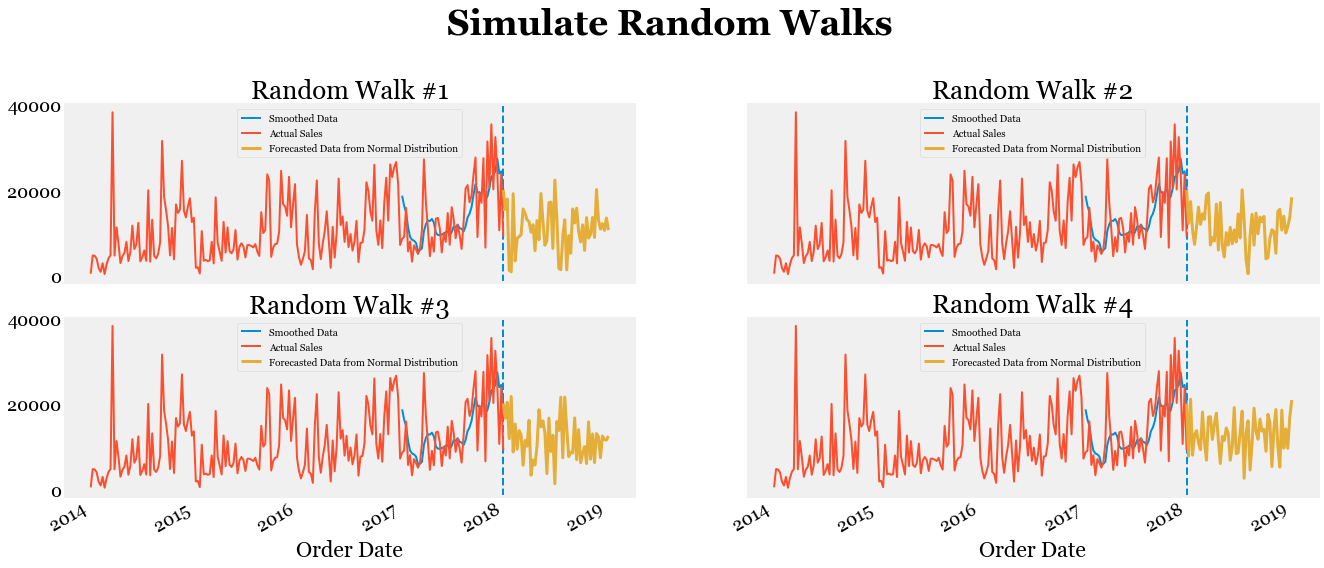

In [56]:
# A random walk
last_sale = smoothed[-1]  ### Take the last smoothend sale since we need to forecast from that point onwards
num_weeks = 53  ### Due to uncertainity in no of weeks we have put 53, bcz few years will have 52 and few will have 53

mu = smoothed.mean()
std = smoothed.std()

index = pd.date_range('2017-12-31', periods=54, freq='W') ## This is our last date in the data

def make_sim_plot(ax=ax, title=''):
    sales_series = []
    sales_series.append(last_sale)

    for week in range(num_weeks):
        weekly_sales = np.random.normal(mu, std) ## select a random number from the given normal disturbution with given mu and std
        if weekly_sales < 0:  ## Rounding of negaive values of sales to zero
            weekly_sales = 0
        sales_series.append(weekly_sales)
    s = pd.Series(sales_series, index=index)
    ax.set_title(title)
    #ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
    ax.axvline(x=s.index.min().date(), linestyle='dashed', linewidth=2)

    smoothed[-52:].plot(ax=ax, linewidth=2, label="Smoothed Data") # Plotting last 1 year of smoothed data
    sales.plot(ax=ax, linewidth=2, label="Actual Sales") # Plotting all sales data
    s.plot(ax=ax, linewidth=3, label='Forecasted Data from Normal Distribution') # PLotting forecasted data
    ax.legend(fontsize=10)

fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(20,8))

make_sim_plot(ax1, title='Random Walk #1')
make_sim_plot(ax2, title='Random Walk #2')
make_sim_plot(ax3, title='Random Walk #3')
make_sim_plot(ax4, title='Random Walk #4')
ax2.set_yticks([])
ax4.set_yticks([])
ax2.set_xticks([])
ax2.set_xlabel('')
ax1.set_xticks([])
ax1.set_xlabel('')

ax1.grid(None)
ax2.grid(None)
ax3.grid(None)
ax4.grid(None)

fig.suptitle('Simulate Random Walks', fontsize=35, fontweight='bold', y=1.05)

In the Monte Carlo simulation we run this process many times in order to capture predictable randomness.

Text(0.5, 0.98, 'Simulations of 1,000 Random Walks')

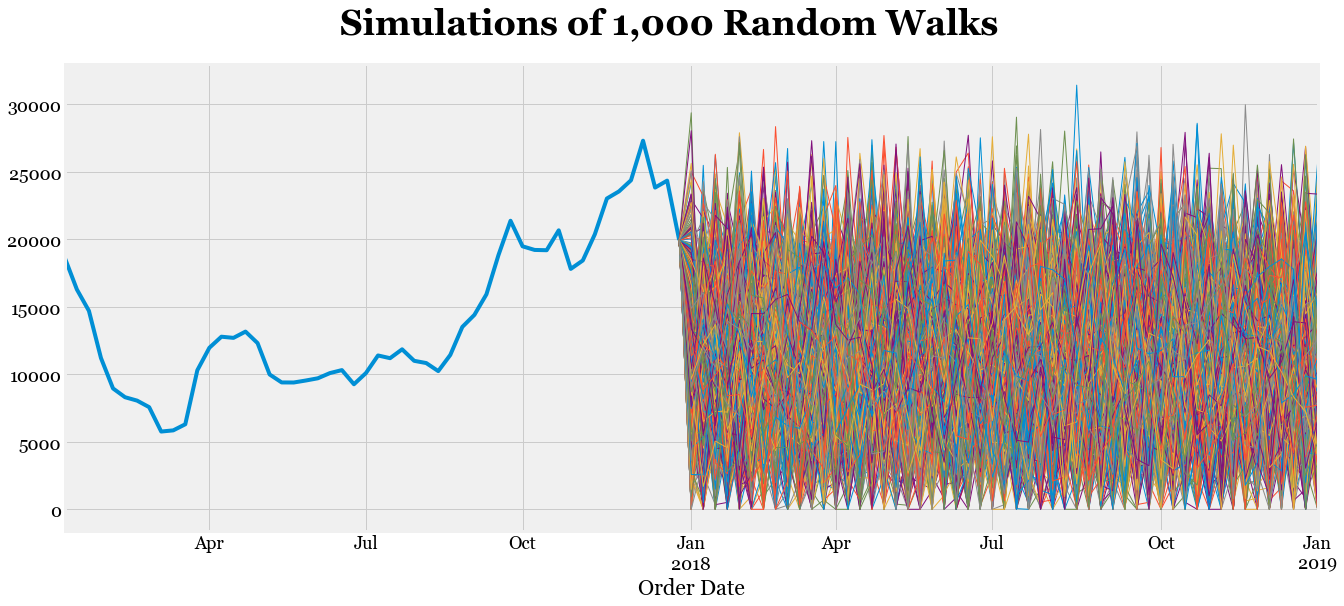

In [57]:
# Many, many random walks
num_simulations = 1000
num_weeks = 53

last_sale = smoothed[-1]
mu = smoothed.mean()
std = smoothed.std()

index = pd.date_range('2017-12-31', periods=54, freq='W')

simulation_df = pd.DataFrame()

sales_2018 = []

for sim in range(num_simulations):
    sales_series = []
    sales_series.append(last_sale)

    for week in range(num_weeks):
        weekly_sales = np.random.normal(mu, std)
        if weekly_sales < 0:
            weekly_sales = 0
        sales_series.append(weekly_sales)
    
    sales_2018.append(np.sum(sales_series))
    simulation_df[sim] = sales_series

simulation_df.index = index

fig, ax = plt.subplots(figsize=(20,8))
smoothed[-52:].plot(ax=ax)
simulation_df.plot(ax=ax, legend=False, linewidth=1)

#ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
fig.suptitle('Simulations of 1,000 Random Walks', fontsize=35, fontweight='bold')

### Analysis of our predictions for 2018 based on MC Simulations
**Before doing the analysis we need to understand Standard Deviation.**

The standard deviation is the average amount of variability in your dataset. It tells you, on average, how far each value lies from the mean. A high standard deviation means that values are generally far from the mean, while a low standard deviation indicates that values are clustered close to the mean.

In normal distributions, data is symmetrically distributed with no skew. Most values cluster around a central region, with values tapering off as they go further away from the center. The standard deviation tells you how spread out from the center of the distribution your data is on average.


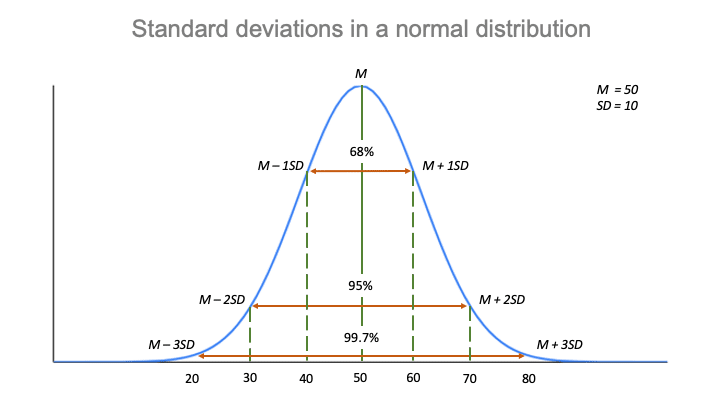

As seen above one standard deviation from the mean will take in 68% of all data in a normal model, two standard deviations from the mean will take in 95% of the data and 3 standard deviation will take 99.7% of the data.

Text(0.5, 0.98, 'Total 2018 Sales Simulation')

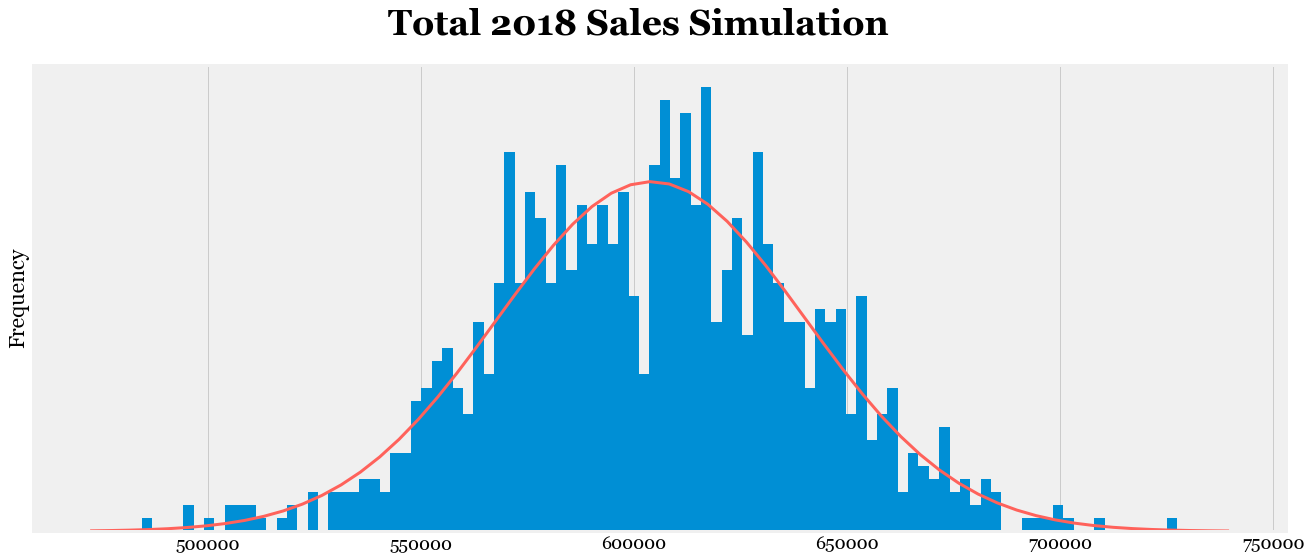

In [61]:
#Random walk total sales

fig, ax = plt.subplots(figsize=(20,8))
simulations_2018 = pd.Series(data=sales_2018)
simulations_2018.plot.hist(bins=100, ax=ax, density=True)

# Plot the pdf
xmin, xmax = plt.xlim()
mean = simulations_2018.mean()
std = simulations_2018.std()

x = np.linspace(xmin, xmax, 60)
p = norm.pdf(x, mean, std)
ax.plot(x, p, color='#FF625B', linewidth=3)
ax.set_yticks([])
#ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
fig.suptitle('Total 2018 Sales Simulation', fontsize=35, fontweight='bold')

Text(0.5, 0.98, '2018 Total Sales Normal Distribution')

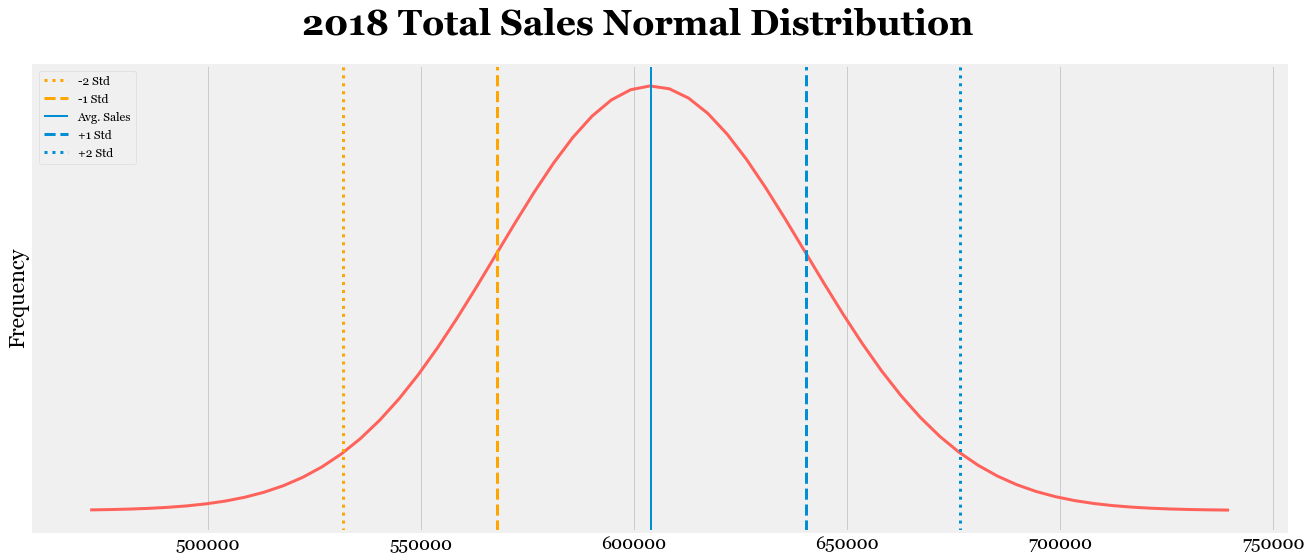

In [60]:
# 2018 Sales normal distribution
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(x, p, color='#FF625B', linewidth=3)

ax.set_yticks([])
ax.set_ylabel('Frequency')

ax.axvline(mean - (std * 2), linewidth=3, label='-2 Std', linestyle='dotted', color='orange')
ax.axvline(mean - std, linewidth=3, label='-1 Std', linestyle='dashed', color='orange')
ax.axvline(mean, linewidth=2, label="Avg. Sales")
ax.axvline(mean + std, linewidth=3, label='+1 Std', linestyle='dashed')
ax.axvline(mean + (std * 2), linewidth=3, label='+2 Std', linestyle='dotted')

ax.legend(fontsize=12, loc='upper left')
fig.suptitle('2018 Total Sales Normal Distribution', fontsize=35, fontweight='bold')

From our distribution with a mean of 604045.243 and standard deviation of 36233.753 we would expect our 95% of the data to be covered by values that are 2 standard deviations from the mean, or (604045.243 - (2*36233.753)) and (604045.243 + (2*36233.753)) which is 531577.737 and 676502.506.

We can confirm this by calculating the exact values using the percentage-point function.

The middle 95% would be defined by the percentage point function value for 2.5% at the low end and 97.5% at the high end, where 97.5 – 2.5 gives the middle 95%.

For more understanding of ppf refer the link: https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/

In [74]:
from scipy.stats import norm
#mean + std * norm.
#mean + (std * norm.ppf(.25))
print("It's highly likely that you sales will be between ${:,.0f} and ${:,.0f}.".format(mean + (2 * -std), mean + (2 * std)))
print("There's a 25% chance that sales will be less than {:,.0f}.".format(mean + (std * norm.ppf(.25))))
print("There's a 97% chance that sales will be less than {:,.0f}.".format(mean + (std * norm.ppf(.975))))

print("There's a 25% chance that sales will be greater than {:,.0f}.".format(mean - (std * norm.ppf(.25))))
print("There's a 97% chance that sales will be greater than {:,.0f}.".format(mean - (std * norm.ppf(.975))))

It's highly likely that you sales will be between $531,578 and $676,513.
There's a 25% chance that sales will be less than 579,606.
There's a 97% chance that sales will be less than 675,062.
There's a 25% chance that sales will be greater than 628,485.
There's a 97% chance that sales will be greater than 533,028.
